# Heart Disease Prediction Project

## Overview

In this project, I will go through these steps in order to build a heart disease classifier. To build the heart disease classifier by using [UCI heart disease](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) dataset. 


### Dataset

The dataset has 14 attributes:
 
* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


## Import Libraries

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

# to save the best model.
import pickle

# 1: Prepare Data for Machine Learning

In [2]:
# Read data in the excel file
df = pd.read_csv('data.csv')

In [3]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [4]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Here, I will use the below machine learning algorithms then I will select the best one based on its classification report.

* Support Vector Machine 
* Random Forest
* Ada Boost
* Gradient Boosting


# 2: Train and Evaluate Models

In [5]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [17]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [7]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       0.71      0.90      0.79        30
           2       0.81      0.54      0.65        24

    accuracy                           0.74        54
   macro avg       0.76      0.72      0.72        54
weighted avg       0.76      0.74      0.73        54


confusion_matrix :
[[27  3]
 [11 13]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54


confusion_matrix :
[[22  8]
 [ 7 17]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.7

#### Selecting the Classifier
From the results, the best classifier is GradientBoostingClassifier. 



# 2.1: The Important Features

Feature: age, Score: 0.06003
Feature: sex, Score: 0.01170
Feature: cp, Score: 0.28587
Feature: trestbps, Score: 0.03719
Feature: chol, Score: 0.06027
Feature: fbs, Score: 0.00082
Feature: restecg, Score: 0.00376
Feature: thalach, Score: 0.06526
Feature: exang, Score: 0.02465
Feature: oldpeak, Score: 0.13452
Feature: slope, Score: 0.04946
Feature: ca, Score: 0.17047
Feature: thal, Score: 0.09600


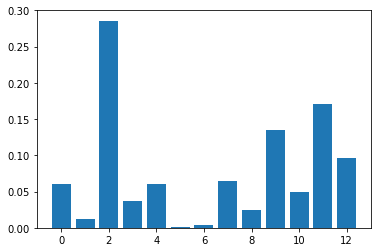

In [8]:
# get importance
importance = gb.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.show()

# 3: Save Model

 Finally, I will save the GradientBoostingClassifier model to use it later. 

In [9]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)

# 4: Summary

As a summary, in this note book, I built four models for heart disease classification. Finally, I selected the best model and save it to use it latter.